In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
## Data downloaded from https://www.kaggle.com/datasets/shashanks1202/retail-transactions-online-sales-dataset

df0 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [55]:
df = pd.concat([df0,df1], ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Exploratory Data Analysis -- separate datasets 2009-2010 & 2010-2011

In [74]:
print('Year 2009-2010: rows:',df0.shape[0],' columns: ', df0.shape[1])
print('Year 2010-2011: rows:',df1.shape[0],' columns: ', df1.shape[1])

Year 2009-2010: rows: 525461  columns:  8
Year 2010-2011: rows: 541910  columns:  8


In [66]:
df0.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [67]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [71]:
df0.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [72]:
df1.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [81]:
df0.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [82]:
df0[df0.duplicated(keep=False)].sort_values(by = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
420572,C529606,22728,ALARM CLOCK BAKELIKE PINK,-12,2010-10-29 10:28:00,3.75,17396.0,United Kingdom
483397,C534698,22119,PEACE WOODEN BLOCK LETTERS,-1,2010-11-23 15:59:00,6.95,16242.0,United Kingdom
483401,C534698,22119,PEACE WOODEN BLOCK LETTERS,-1,2010-11-23 15:59:00,6.95,16242.0,United Kingdom
501989,C536210,22838,3 TIER CAKE TIN RED AND CREAM,-1,2010-11-30 13:27:00,14.95,17402.0,United Kingdom


In [83]:
df1[df1.duplicated(keep=False)].sort_values(by = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


In [85]:
df0.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [86]:
df1.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [87]:
df0['Description'].value_counts(dropna=False)

WHITE HANGING HEART T-LIGHT HOLDER     3549
NaN                                    2928
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: Description, Length: 4682, dtype: int64

In [90]:
df1['Description'].value_counts(dropna=False)[0:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
NaN                                   1454
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
Name: Description, dtype: int64

# Viewing total data from 2009-2011

In [ ]:
df.shape

(1067371, 8)

In [57]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [58]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [64]:
df.Country.value_counts(dropna=False)

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [59]:
df['Total_Sales'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [60]:
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['Day'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales,YearMonth,Date,Year,Month,Day,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12,2009-12-01,2009,12,1,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009-12-01,2009,12,1,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009-12-01,2009,12,1,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12,2009-12-01,2009,12,1,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12,2009-12-01,2009,12,1,07:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,2011-12-09,2011,12,9,12:50:00
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-09,2011,12,9,12:50:00
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-09,2011,12,9,12:50:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-09,2011,12,9,12:50:00


In [61]:
monthly_sales = df.groupby('YearMonth')['Total_Sales'].sum().reset_index()
monthly_sales

,YearMonth,Total_Sales
0,2009-12,799847.110
1,2010-01,624032.892
2,2010-02,533091.426
3,2010-03,765848.761
4,2010-04,590580.432
5,2010-05,615322.830
6,2010-06,679786.610
7,2010-07,575236.360
8,2010-08,656776.340
9,2010-09,853650.431


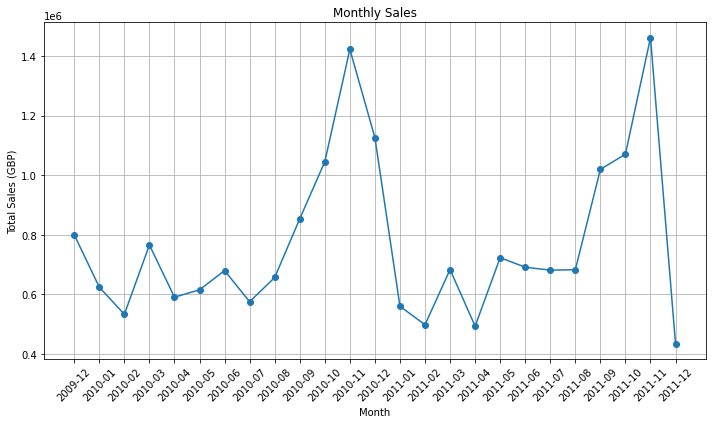

In [63]:
plt.subplots(2,1)
plt.figure[0](figsize=(10, 6))
plt.figure[1](figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Total_Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (GBP)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [36]:
total_per_month = df.groupby(by=['YearMonth']).sum()
total_per_month = total_per_month.reset_index()
total_per_month = total_per_month[['YearMonth', 'Quantity', 'Price']]
total_per_month

,YearMonth,Quantity,Price
0,2009-12,420088,198307.760
1,2010-01,375363,165671.362
2,2010-02,368402,116774.536
3,2010-03,489370,268304.241
4,2010-04,351971,120708.372
5,2010-05,364095,142885.530
6,2010-06,388253,234869.690
7,2010-07,302201,100650.900
8,2010-08,451803,157778.090
9,2010-09,478262,223763.221


ValueError: Unrecognized character i in format string

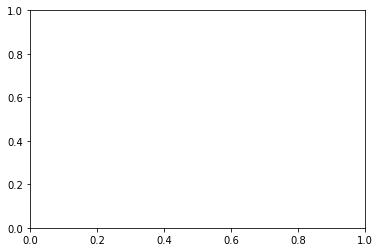

In [38]:
plt.plot('YearMonth','Price')

In [14]:
df.Invoice.nunique()

28816

In [15]:
df.Description.nunique()

4681

In [23]:
df['Description'] = df.Description.apply(lambda x: x.lower() if isinstance(x, str) else x)
df.Description.value_counts(dropna=False)

white hanging heart t-light holder     3549
NaN                                    2928
regency cakestand 3 tier               2212
strawberry ceramic trinket box         1843
pack of 72 retro spot cake cases       1466
                                       ... 
display stands                            1
ebay sales by the box.                    1
rusty connections                         1
stock credited from royal yacht inc       1
faulty                                    1
Name: Description, Length: 4673, dtype: int64

In [25]:
description = df.Description.value_counts(dropna=False).reset_index()
description

,index,Description
0,white hanging heart t-light holder,3549
1,NaN,2928
2,regency cakestand 3 tier,2212
3,strawberry ceramic trinket box,1843
4,pack of 72 retro spot cake cases,1466
...,...,...
4668,display stands,1
4669,ebay sales by the box.,1
4670,rusty connections,1
4671,stock credited from royal yacht inc,1


In [26]:
description['new'] = description['index']
description

,index,Description,new
0,white hanging heart t-light holder,3549,white hanging heart t-light holder
1,NaN,2928,NaN
2,regency cakestand 3 tier,2212,regency cakestand 3 tier
3,strawberry ceramic trinket box,1843,strawberry ceramic trinket box
4,pack of 72 retro spot cake cases,1466,pack of 72 retro spot cake cases
...,...,...,...
4668,display stands,1,display stands
4669,ebay sales by the box.,1,ebay sales by the box.
4670,rusty connections,1,rusty connections
4671,stock credited from royal yacht inc,1,stock credited from royal yacht inc


In [31]:
description[description['Description'] == 1]

,index,Description,new
4415,new baroque black boxes,1,new baroque black boxes
4416,drawer knob acrylic edwardian green,1,drawer knob acrylic edwardian green
4417,"number tile vintage font, 4",1,"number tile vintage font, 4"
4418,baking mould easter egg milk choc,1,baking mould easter egg milk choc
4419,drawer knob acrylic edwardian clear,1,drawer knob acrylic edwardian clear
...,...,...,...
4668,display stands,1,display stands
4669,ebay sales by the box.,1,ebay sales by the box.
4670,rusty connections,1,rusty connections
4671,stock credited from royal yacht inc,1,stock credited from royal yacht inc


In [17]:
df.Country.value_counts(dropna=False)

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  